# Week 4

Yay! It's week 4. Last week had a lot of material, this week we only have three components with very little reading. 


## Overview

* A video lecture with a few questions
* An exercise on visualizing geodata using a different set of tools from the ones we played with previously.
* Thinking about visualization, data quality, and binning. Why ***looking at the details of the data before applying fancy methods*** is often important.

## Part 1: More lecturing on dataviz

We begin today by learning more about the theory of visualization, digging into data encodings and representations.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/zE6Nr8trdrw/0.jpg)](https://www.youtube.com/watch?v=zE6Nr8trdrw)

> *Excercise:* Some questions about the video. <font color=gray>Try to answer using your human brain (rather than your LLMs first). </font>
>
> * Mention 10 examples of ways we can encode data.
> *Many kinds of data encoding exists (any kind of plotting). It could be time series, spatial, network, hierarchies etc.*
> * Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
> *??*
> * Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
> *Angles, areas/sizes and color intensity are difficult for the human eye to parse. E.g. a pie chart (with angles)*
> * Explain in your own words: What is the problem with pie-charts?
> *Pie-charts are based on angles, which is difficult for the eye to distinguish if some angles are very similar.*

## Part 2: Visualizing geo-data

It turns out that `plotly` (which we used during Week 2) is not the only way of working with geo-data. There are many different ways to go about it. (The more advanced PhD and PostDoc researchers in my group simply use matplotlib, since that provides more control. For an example of that kind of thing, check out [this tutorial](https://towardsdatascience.com/visualizing-geospatial-data-in-python-e070374fe621).)

Today, we'll try another library for geodata called [Folium](https://github.com/python-visualization/folium). It's good for you all to try out a few different libraries - remember that data visualization and analysis in Python is all about the ability to use many different tools. 

The exercise below is based on the code illustrated in this nice [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data), so let us start by taking a look at that one.

*Reading*. Read through the following tutorial
 * "How to: Folium for maps, heatmaps & time data". Get it here: https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data. \[**UPDATE 2024**: Note that the Stamen tiles are no longer avialible.\]
 * (Optional) There are also some nice tricks in "Spatial Visualizations and Analysis in Python with Folium". Read it here: https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf

> *Exercise*: A different take on geospatial data. <font color=gray>It's OK to use your LLM for all of the Folium exercises</font>.
>
>A couple of weeks ago (Part 3 of Week 2), we worked with spacial data by using color-intensity of shapefiles to show the counts of certain crimes within those individual areas. Today, we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.
> 
> * First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command `folium.Map([lat, lon], zoom_start=13)`, where you'll have to look up San Francisco's longitude and latitude.
> * Next, use the the coordinates for SF City Hall `37.77919, -122.41914` to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool. <mark>**UPDATE 2024**: Note that the Stamen tiles are no longer avialible, but there are many other tile-options. Link for more options on Stamen [**here**](https://stamen.com/here-comes-the-future-of-stamen-maps/)</mark>).
>  
> <img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/city_hall_2022.png" alt="drawing" width="600"/>
>
> * Now, let's plot some more data (no need for pop-ups this time). Select a couple of months of data for `'DRUG/NARCOTIC'` and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. 
> We can call this kind of visualization a *point scatter plot*.

Ok. Time for a little break. Note that a nice thing about Folium is that you can zoom in and out of the maps.

> *Exercise*: Heatmaps.
> * Now, let's play with **heatmaps**. You can figure out the appropriate commands by grabbing code from the main [tutorial](https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data)) and modifying to suit your needs.
>    * To create your first heatmap, grab all arrests for the category `'SEX OFFENSES, NON FORCIBLE'` across all time. Play with parameters to get plots you like.
>    * Now, comment on the differences between scatter plots and heatmaps. 
>.      - What can you see using the scatter-plots that you can't see using the heatmaps? 
>.      - And *vice versa*: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?
>    * Play around with the various parameters for heatmaps. You can find a list here: https://python-visualization.github.io/folium/plugins.html
>    * Comment on the effect on the various parameters for the heatmaps. How do they change the picture? (at least talk about the `radius` and `blur`).

### Geospatial data

In [164]:
import numpy as np
import pandas as pd
import folium

map = folium.Map([37.773972, -122.431297], zoom_start=13)
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(map)    # add city hall

map


In [165]:
# load the file
data = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

month_mapping = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}

# add year column
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month.map(month_mapping)
data["Hour"] = data["Time"].astype(str).str[:2]
data["Time"] = pd.to_datetime(data["Time"]).dt.strftime('%H:%M')

data = data[data["Year"] != 2018]

In [166]:
# filter the data to contain only drug/narcotic in first half of 2015 in hours 13-14
data_ss1 = data[(data["Category"] == 'DRUG/NARCOTIC') & (data["Date"] >= '2015-01-01') & (data["Date"] < '2015-03-01')]

In [167]:
for i,row in data_ss1.iterrows():
    folium.CircleMarker(location = [row["Y"], row["X"]], radius=1).add_to(map)    # add city hall

In [168]:
map

### Heatmaps

In [169]:
# filter the data to contain only SEX OFFENSES, NON FORCIBLE across all time
data_ss2 = data[(data["Category"] == 'SEX OFFENSES, NON FORCIBLE')]

In [170]:
from folium.plugins import HeatMap

# Ensure you're handling floats
data_ss2[['Y', 'X']] = data_ss2[['Y', 'X']].astype(float)

# Drop NaN values
heat_data = data_ss2[['Y', 'X']].dropna()

# Convert DataFrame to list of lists
heat_data = heat_data.values.tolist()

# Plot it on the map
HeatMap(heat_data, blur=5).add_to(map);

C:\Users\45229\AppData\Local\Temp/ipykernel_8764/78074755.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ss2[['Y', 'X']] = data_ss2[['Y', 'X']].astype(float)


In [171]:
# Display the map
map

**Comments on heatmap**

*The heatmap makes an average of where the heavy crime activities are and the heat map changes as one zoom in or out.*

*An increased radius makes the heatmap cover more area, whereas a decreased radius makes more small heats*

*A low blur makes the color changes very sharp, whereas a high blur makes the color/heat more flowy*

For the final element of working with heatmaps, let's now use the cool Folium functionality `HeatMapWithTime` to create a visualization of how the patterns of your favorite crime-type changes over time.

> *Exercise*: Heatmap movies. This exercise is a bit more independent than above - you get to make all the choices.
> * Start by choosing your favorite crimetype. Prefereably one with spatial patterns that change over time (use your data-exploration from the previous lectures to choose a good one).
> * Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though.
> * Create the movie using `HeatMapWithTime`.
> * Comment on your results: 
>   - What patterns does your movie reveal?
>   - Motivate/explain the reasoning behind your choice of crimetype and time-resolution. 

### Heatmap movies

In [179]:
# filter the data to contain only SEX OFFENSES, NON FORCIBLE across all time
data_ss3 = data[(data["Category"] == 'ASSAULT') & (data["Year"] == 2015)]

In [189]:
from folium import plugins

map3 = folium.Map([37.773972, -122.431297], zoom_start=13)

# Ensure you're handing it floats
data_ss3['Y'] = data_ss3['Y'].astype(float)
data_ss3['X'] = data_ss3['X'].astype(float)
# data_ss3['Date'] = pd.to_datetime(data_ss3['Date'])

# Filter the DF for rows, then columns, then remove NaNs
# heat_df = data_ss3[data_ss3['Year']=='2015'] # Reducing data size so it runs faster
heat_df = data_ss3[['Y', 'X']]

# Create weight column, using date
heat_df['Weight'] = data_ss3['Date'].dt.isocalendar().week
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Y','X', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Y'],row['X']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(0,52)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map3)
# Display the map
map3;

C:\Users\45229\AppData\Local\Temp/ipykernel_8764/2252002125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ss3['Y'] = data_ss3['Y'].astype(float)
C:\Users\45229\AppData\Local\Temp/ipykernel_8764/2252002125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ss3['X'] = data_ss3['X'].astype(float)
C:\Users\45229\AppData\Local\Temp/ipykernel_8764/2252002125.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

## Part 3: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. <font color=gray>It's 100% OK to use your LLM for this one.</font>

1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
2. Last week, when we investigated the details of how the timestamps are recorded using jitter-plots in the DAOST exercises, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
3. Also, the *Hall of Justice* on the 800 block of Bryant street seems to be an unlikely hotspot for sex offences. Take a look here [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.
>
>This last exercise for today has two parts:
> * In each of the examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
> * Find your own example of human noise in the data and visualize it.
> * Were you able to use your LLM for anything in this exercise?

### Errors

1. If we did not find this data-error the binned data would not nescessarily point it out, since the bins probably would be shown in days and so it would just occur that thurday was a little bussier than the other days.
2. This kind of data-error would show a wrong distribution of when the crimes are more heavy.
3. I don't know.

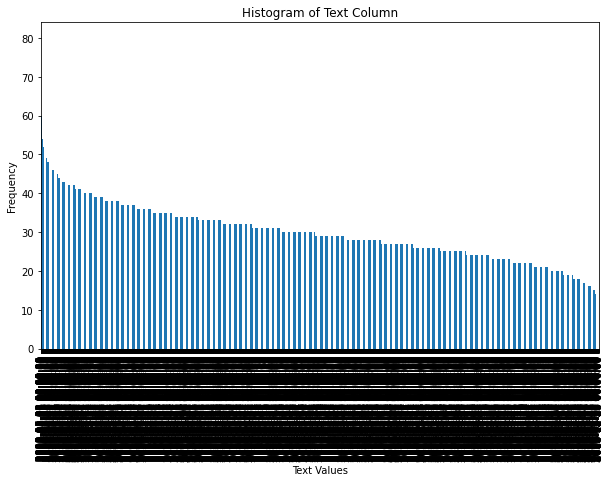

In [174]:
# Assuming 'text_column' is the name of your text column
text_counts = data_ss3['Date'].value_counts()

plt.figure(figsize=(10,6))
text_counts.plot(kind='bar')
plt.xlabel('Text Values')
plt.ylabel('Frequency')
plt.title('Histogram of Text Column')
plt.show()